# Weibull Options Comparison


In [1]:
import PV_ICE
import numpy as np
import matplotlib.pyplot as plt

r1 = PV_ICE.Simulation(name='Simulation1')

baselinefile = r'C:\Users\sayala\Documents\GitHub\CircularEconomy-MassFlowCalculator\PV_ICE\baselines\baseline_modules_US.csv'
materialfile = r'C:\Users\sayala\Documents\GitHub\CircularEconomy-MassFlowCalculator\PV_ICE\baselines\baseline_material_glass.csv'
r1.createScenario(name='standard', file=baselinefile)
r1.scenario['standard'].addMaterial('glass', file=materialfile)


path = C:\Users\sayala\Documents\GitHub\CircularEconomy-MassFlowCalculator\docs\tutorials


## A. Passing Alpha and Beta values

In [2]:
weibullInputParams = {'alpha': 3.4,
                      'beta': 4.5}
r1.calculateMassFlow(weibullInputParams=weibullInputParams)
print(r1.scenario['standard'].data.WeibullParams.head())

Working on Scenario:  standard
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
0    {'alpha': 3.4, 'beta': 4.5}
1    {'alpha': 3.4, 'beta': 4.5}
2    {'alpha': 3.4, 'beta': 4.5}
3    {'alpha': 3.4, 'beta': 4.5}
4    {'alpha': 3.4, 'beta': 4.5}
Name: WeibullParams, dtype: object


## B. Internally calculated Weibull with t50 and t90

In [3]:
r1.calculateMassFlow()
print(r1.scenario['standard'].data.WeibullParams.head())

Working on Scenario:  standard
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
0    {'alpha': 4.173167120209922, 'beta': 16.376973...
1    {'alpha': 4.173167120209922, 'beta': 16.376973...
2    {'alpha': 6.283760582394805, 'beta': 20.141170...
3    {'alpha': 6.283760582394805, 'beta': 20.141170...
4    {'alpha': 6.283760582394805, 'beta': 20.141170...
Name: WeibullParams, dtype: object


# Plotting CDFs with Helper Function

Using ``PV_ICE.weibull_cdf_vis`` to plot different values of alpha and beta, some calculated from t50 and t90 and some passed from literature values.



In [4]:
firstgen = r1.scenario['standard'].data.WeibullParams.iloc[0]
ares = PV_ICE.weibull_cdf_vis(firstgen['alpha'],firstgen['beta'])

twentythirtygen = firstgen = r1.scenario['standard'].data.WeibullParams.iloc[35]
bres = PV_ICE.weibull_cdf_vis(twentythirtygen['alpha'],twentythirtygen['beta'])

#userWeibulls = {'alpha': 3.4,
#               'beta': 4.5}
#userres = PV_ICE.weibull_cdf_vis(userWeibulls['alpha'],userWeibulls['beta'])

# Irena 'EL' 2016
alpha = 2.4928
Lifetime = 30
IrenaEarly = PV_ICE.weibull_cdf_vis(alpha, beta=Lifetime)

# Irena 'RL' 2016
alpha = 5.3759
Lifetime = 30
IrenaReg = PV_ICE.weibull_cdf_vis(alpha, beta=Lifetime)

# Upper Shape Factor Kumar 2013
alpha = 14.41
Lifetime = 30
Kumar = PV_ICE.weibull_cdf_vis(alpha, beta=Lifetime)


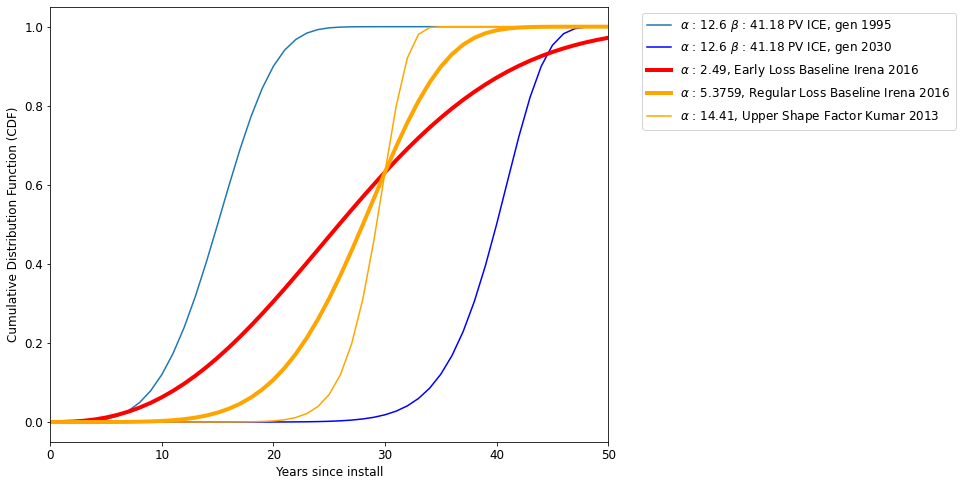

In [5]:
plt.rcParams.update({'font.size': 12})
plt.rcParams['figure.figsize'] = (10, 8)
    
plt.plot(ares, label=r'$ \alpha $ : '+str(round(firstgen['alpha'],2))+ r' $ \beta $ : '+ str(round(firstgen['beta'],2)) + ' PV ICE, gen 1995')
plt.plot(bres, color='b', label=r'$ \alpha $ : '+str(round(twentythirtygen['alpha'],2))+ r' $ \beta $ : '+ str(round(twentythirtygen['beta'],2)) + ' PV ICE, gen 2030')
plt.plot(IrenaEarly, color='red', linewidth=4.0, label=r'$ \alpha $ : 2.49, Early Loss Baseline Irena 2016')
plt.plot(IrenaReg, color='orange', linewidth=4.0, label=r'$ \alpha $ : 5.3759, Regular Loss Baseline Irena 2016')
plt.plot(Kumar, '-', color='orange', label=r'$ \alpha $ : 14.41, Upper Shape Factor Kumar 2013')
plt.legend()
plt.ylabel('Cumulative Distribution Function (CDF)')
plt.xlabel('Years since install')
plt.xlim([0,50])
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')


## Calculating 'alpha' and 'beta' from t50 and t90 

Using ``PV_ICe.weibull_params`` to calculate alpha and beta values for t50 and t90

In [6]:
t50 = 25
t90 = 35

weibullIParams = PV_ICE.weibull_params({t50: 0.50, t90: 0.90})    
print(weibullIParams)

{'alpha': 3.568036928946225, 'beta': 27.704559230401895}


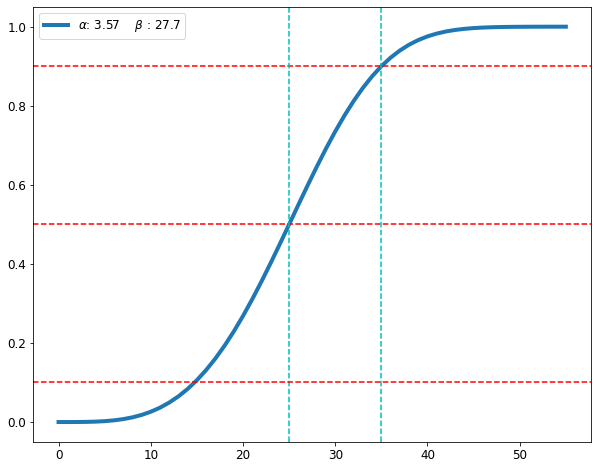

In [7]:
calc_cdf = PV_ICE.weibull_cdf_vis(weibullIParams['alpha'], weibullIParams['beta'])
mylabel = r'$ \alpha $: '+str(round(weibullIParams['alpha'],2))+ r'    $ \beta $ : '+ str(round(weibullIParams['beta'],2))
plt.plot(calc_cdf, linewidth=4.0, label=mylabel)
plt.axhline(y=0.9, color='r', linestyle='--')
plt.axhline(y=0.5, color='r', linestyle='--')
plt.axvline(x=t50, color='c', linestyle='--')
plt.axvline(x=t90, color='c', linestyle='--')
plt.axhline(y=0.1, color='r', linestyle='--')
plt.legend()

In [10]:
t33 = 25
t54 = 30 
t75 = 89

weibullIParams = PV_ICE.weibull_params({t33: 0.33, t54: 0.54, t75: 0.89 })    
print(weibullIParams)

ValueError: too many values to unpack (expected 2)

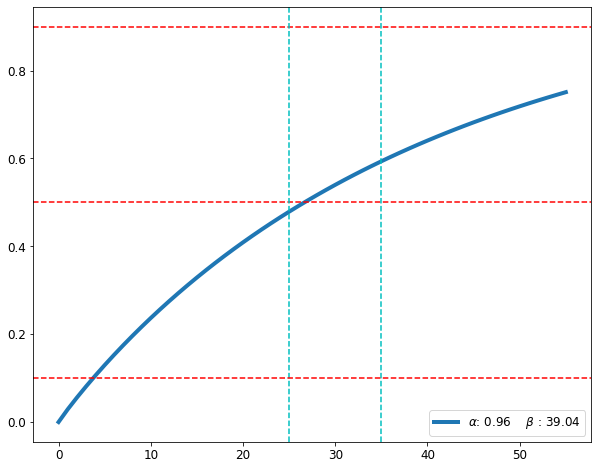

In [11]:
calc_cdf = PV_ICE.weibull_cdf_vis(weibullIParams['alpha'], weibullIParams['beta'])
mylabel = r'$ \alpha $: '+str(round(weibullIParams['alpha'],2))+ r'    $ \beta $ : '+ str(round(weibullIParams['beta'],2))
plt.plot(calc_cdf, linewidth=4.0, label=mylabel)
plt.axhline(y=0.9, color='r', linestyle='--')
plt.axhline(y=0.5, color='r', linestyle='--')
plt.axvline(x=t50, color='c', linestyle='--')
plt.axvline(x=t90, color='c', linestyle='--')
plt.axhline(y=0.1, color='r', linestyle='--')
plt.legend()